# Geopandas Advanced
    *  How to concatenate multiple geopandas frames?
    *  How to chnage the geometry crs
    *  how to display on a basemap
    *  how to display on folium map


## http://geopandas.org/index.html
## https://geohackweek.github.io/vector/04-geopandas-intro/
## https://pythongisresources.wordpress.com/packages/


GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

In [1]:
import os,sys
import glob
import csv
import numpy as np
import pandas as pd
import geopandas as gpd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

mpl.rcParams['figure.figsize']=[30,10]

# Create Geo-database of MT Surveys datasets


1) walk through all edi files

2) get lat lon, station name, etc.

3) create csv, export to shapefile


In [2]:
import mtpy.imaging.penetration_depth_3d_profile as pen3d

INFO:root:module file: E:\Githubz\mtpy2\mtpy\utils\mtpylog.pyc
INFO:root:Effective yaml configuration file E:\Githubz\mtpy2\mtpy\utils\logging.yml


2017-03-06 15:53:42,375 - root - INFO - module file: E:\Githubz\mtpy2\mtpy\utils\mtpylog.pyc
2017-03-06 15:53:42,375 - root - INFO - Effective yaml configuration file E:\Githubz\mtpy2\mtpy\utils\logging.yml


In [3]:

def process_edifiles(edi_files):
    """loop over all edi files to extract relevant properties from each edifile:
        lat, lon, elev, station_name, acquisition_date, ....... 
    """
    
    PER_LIST0=None   # the first period list as a reference for checking other stations period
    latlon_dep=[]  # CSV to be returned
    for afile in edi_files:
        # for efile in edi_files[:2]:
#         logger.debug("processing %s", afile)
        lat,lon, per, depths=pen3d.get_penetration_depths_from_edi_file(afile)
        if PER_LIST0 is None:
            PER_LIST0=per # initial value assignment
            depth_string = ','.join(['%.2f' % num for num in depths])
            latlon_dep.append((lat, lon, depth_string))

        elif len(per)== len(PER_LIST0) and (per == PER_LIST0).all():  # same length and same values.
            depth_string = ','.join(['%.2f' % num for num in depths])
            latlon_dep.append((lat,lon, depth_string))
        else:
            #logger.warn("MT Periods Not Equal !! %s VS %s", per, PER_LIST0 )
            pass

    return latlon_dep



In [4]:

EDI_DIR='/Softlab/Data/MT_datasets/728889/EDI_files'
EDI_DIR='E:/Datasets/MT_Datasets/75098/EDI_files' #'E:/Datasets/MT_Datasets/728889/EDI_files'

edi_files = glob.glob(os.path.join(EDI_DIR, "*.edi"))

if (len(edi_files)<1):
    raise Exception("No edi files found!!!")
    
lat_lon_depth=process_edifiles(edi_files)

2017-03-06 15:53:42,423 - mtpy.imaging.penetration_depth_3d_profile - DEBUG - processing the edi file E:/Datasets/MT_Datasets/75098/EDI_files\B01.edi
2017-03-06 15:53:42,424 - mtpy.core.edi - INFO - Reading the edi file E:/Datasets/MT_Datasets/75098/EDI_files\B01.edi
2017-03-06 15:53:42,426 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to low frequency
2017-03-06 15:53:42,430 - mtpy.core.edi - INFO - Could not find any Tipper data.
2017-03-06 15:53:42,433 - mtpy.core.edi - INFO - Read in edi file for station BB01
2017-03-06 15:53:42,440 - mtpy.imaging.penetration_depth_3d_profile - DEBUG - the scale parameter= 355.881271709
2017-03-06 15:53:42,441 - mtpy.imaging.penetration_depth_3d_profile - DEBUG - processing the edi file E:/Datasets/MT_Datasets/75098/EDI_files\B02.edi
2017-03-06 15:53:42,443 - mtpy.core.edi - INFO - Reading the edi file E:/Datasets/MT_Datasets/75098/EDI_files\B02.edi
2017-03-06 15:53:42,444 - mtpy.core.edi - INFO - Ordered arrays to be arranged fr

E:\Githubz\mtpy2\mtpy\analysis\zinvariants.py:227: RuntimeWarning: invalid value encountered in arcsin
  strikeangerr = abs(.5 * np.arcsin(inv7)) * (180 / np.pi)


2017-03-06 15:53:42,565 - mtpy.imaging.penetration_depth_3d_profile - DEBUG - the scale parameter= 355.881271709
2017-03-06 15:53:42,566 - mtpy.imaging.penetration_depth_3d_profile - DEBUG - processing the edi file E:/Datasets/MT_Datasets/75098/EDI_files\B10.edi
2017-03-06 15:53:42,568 - mtpy.core.edi - INFO - Reading the edi file E:/Datasets/MT_Datasets/75098/EDI_files\B10.edi
2017-03-06 15:53:42,569 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to low frequency
2017-03-06 15:53:42,572 - mtpy.core.edi - INFO - Could not find any Tipper data.
2017-03-06 15:53:42,575 - mtpy.core.edi - INFO - Read in edi file for station BB10
2017-03-06 15:53:42,579 - mtpy.imaging.penetration_depth_3d_profile - DEBUG - the scale parameter= 355.881271709
2017-03-06 15:53:42,582 - mtpy.imaging.penetration_depth_3d_profile - DEBUG - processing the edi file E:/Datasets/MT_Datasets/75098/EDI_files\B11.edi
2017-03-06 15:53:42,582 - mtpy.core.edi - INFO - Reading the edi file E:/Datasets/MT_D

E:\Githubz\mtpy2\mtpy\analysis\pt.py:1206: RuntimeWarning: invalid value encountered in absolute
  np.sum([np.abs(-pt_array[0, 0] * realz[1, 1] * z_err_array[0, 0]) ** 2,
E:\Githubz\mtpy2\mtpy\analysis\pt.py:1206: RuntimeWarning: invalid value encountered in double_scalars
  np.sum([np.abs(-pt_array[0, 0] * realz[1, 1] * z_err_array[0, 0]) ** 2,
E:\Githubz\mtpy2\mtpy\analysis\pt.py:1209: RuntimeWarning: invalid value encountered in absolute
  z_err_array[0, 1]) ** 2,
E:\Githubz\mtpy2\mtpy\analysis\pt.py:1209: RuntimeWarning: invalid value encountered in double_scalars
  z_err_array[0, 1]) ** 2,
E:\Githubz\mtpy2\mtpy\analysis\pt.py:1212: RuntimeWarning: invalid value encountered in absolute
  np.abs(realz[1, 1] * z_err_array[0, 0]) ** 2,
E:\Githubz\mtpy2\mtpy\analysis\pt.py:1212: RuntimeWarning: invalid value encountered in double_scalars
  np.abs(realz[1, 1] * z_err_array[0, 0]) ** 2,
E:\Githubz\mtpy2\mtpy\analysis\pt.py:1216: RuntimeWarning: invalid value encountered in absolute
  np.

2017-03-06 15:53:43,868 - mtpy.imaging.penetration_depth_3d_profile - DEBUG - the scale parameter= 355.881271709
2017-03-06 15:53:43,868 - mtpy.imaging.penetration_depth_3d_profile - DEBUG - processing the edi file E:/Datasets/MT_Datasets/75098/EDI_files\L25.edi
2017-03-06 15:53:43,869 - mtpy.core.edi - INFO - Reading the edi file E:/Datasets/MT_Datasets/75098/EDI_files\L25.edi
2017-03-06 15:53:43,871 - mtpy.core.edi - INFO - Ordered arrays to be arranged from high to low frequency
2017-03-06 15:53:43,875 - mtpy.core.edi - INFO - Read in edi file for station LP25
2017-03-06 15:53:43,881 - mtpy.imaging.penetration_depth_3d_profile - DEBUG - the scale parameter= 355.881271709
2017-03-06 15:53:43,881 - mtpy.imaging.penetration_depth_3d_profile - DEBUG - processing the edi file E:/Datasets/MT_Datasets/75098/EDI_files\L26.edi
2017-03-06 15:53:43,882 - mtpy.core.edi - INFO - Reading the edi file E:/Datasets/MT_Datasets/75098/EDI_files\L26.edi
2017-03-06 15:53:43,884 - mtpy.core.edi - INFO - 

In [5]:

mypdf=pd.DataFrame(lat_lon_depth)

In [6]:
mypdf.head()

,0,1,2
0,-25.0482,128.2728,"5.17,54.13,69.46,111.20,139.19,214.43,266.28,4..."
1,-25.1328,128.1152,"10.33,86.29,191.71,386.30,542.84,856.02,1055.0..."
2,-25.1951,128.0423,"18.38,171.71,210.80,318.73,397.91,591.31,714.9..."
3,-25.2557,127.9728,"19.55,62.79,76.11,112.53,140.22,217.03,271.02,..."
4,-25.2959,127.8855,"46.14,89.30,94.37,119.33,141.58,199.62,240.01,..."


In [7]:
history(mypdf.rename())

In [8]:
mypdf.rename(columns={0: 'lat', 1: 'lon', 2: 'pendepths'}, inplace=True)

In [9]:
mypdf.head()

,lat,lon,pendepths
0,-25.0482,128.2728,"5.17,54.13,69.46,111.20,139.19,214.43,266.28,4..."
1,-25.1328,128.1152,"10.33,86.29,191.71,386.30,542.84,856.02,1055.0..."
2,-25.1951,128.0423,"18.38,171.71,210.80,318.73,397.91,591.31,714.9..."
3,-25.2557,127.9728,"19.55,62.79,76.11,112.53,140.22,217.03,271.02,..."
4,-25.2959,127.8855,"46.14,89.30,94.37,119.33,141.58,199.62,240.01,..."


In [10]:
mypdf.shape

(68, 3)

In [11]:
from shapely.geometry import Point

# combine lat and lon column to a shapely Point() object
mypdf['geometry'] = mypdf.apply(lambda x: Point((float(x[1]), float(x[0]))), axis=1)

In [12]:
mygdf = gpd.GeoDataFrame(mypdf, geometry='geometry')

In [13]:
mygdf.head()

,lat,lon,pendepths,geometry
0,-25.0482,128.2728,"5.17,54.13,69.46,111.20,139.19,214.43,266.28,4...",POINT (128.2728 -25.0482)
1,-25.1328,128.1152,"10.33,86.29,191.71,386.30,542.84,856.02,1055.0...",POINT (128.1152 -25.1328)
2,-25.1951,128.0423,"18.38,171.71,210.80,318.73,397.91,591.31,714.9...",POINT (128.0423 -25.1951)
3,-25.2557,127.9728,"19.55,62.79,76.11,112.53,140.22,217.03,271.02,...",POINT (127.9728 -25.2557)
4,-25.2959,127.8855,"46.14,89.30,94.37,119.33,141.58,199.62,240.01,...",POINT (127.8855 -25.2959)


In [14]:

mygdf.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

mt_survey_loc_shp = os.path.join(EDI_DIR,'mt_survey_sites.shp') 
mygdf.to_file(mt_survey_loc_shp, driver='ESRI Shapefile')

2017-03-06 15:53:44,073 - Fiona - DEBUG - Deleted pre-existing layer at mt_survey_sites
2017-03-06 15:53:44,101 - Fiona - DEBUG - Created layer
2017-03-06 15:53:44,102 - Fiona - DEBUG - Creating field: lat float
2017-03-06 15:53:44,102 - Fiona - DEBUG - Creating field: lon float
2017-03-06 15:53:44,104 - Fiona - DEBUG - Creating field: pendepths str
2017-03-06 15:53:44,105 - Fiona - DEBUG - Created fields
2017-03-06 15:53:44,105 - Fiona - DEBUG - Writing started
2017-03-06 15:53:44,107 - Fiona - DEBUG - Creating feature in layer: {'geometry': {'type': 'Point', 'coordinates': (128.2728, -25.0482)}, 'type': 'Feature', 'id': '0', 'properties': {'lat': -25.0482, 'lon': 128.2728, 'pendepths': '5.17,54.13,69.46,111.20,139.19,214.43,266.28,407.71,507.76,761.33,878.99,1180.16,1521.12,2126.29,2306.96,2899.96,3249.37,4128.82,4557.48,5581.23,6307.60,7911.22,8222.69,9446.33,10518.26,11536.26,12501.66,16185.18,17180.18,22980.80,28480.77,43330.94'}}
2017-03-06 15:53:44,108 - Fiona - DEBUG - Looking 

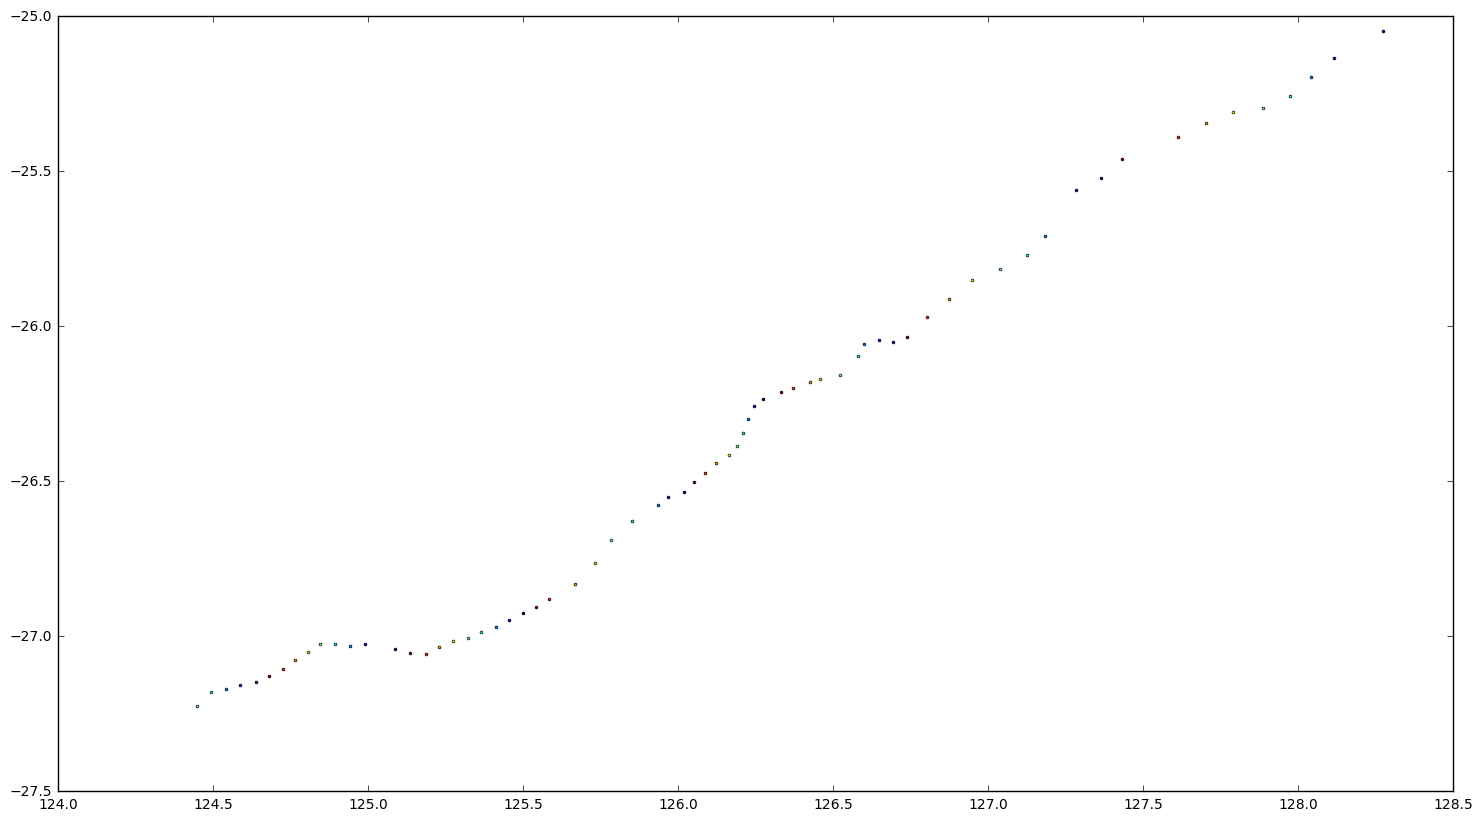

In [15]:
mygdf.plot()

In [16]:
mygdf2=mygdf.to_crs({'init':'epsg:4283'}) 
# WGS84: 'epsg:4326'

# GDA94:  EPSG:4283 See  http://epsg.io/4283

#http://spatialreference.org/ref/epsg/4283/


In [17]:
mygdf2.crs

{'init': 'epsg:4283'}

In [18]:
mygdf2utm=mygdf2.to_crs({'init':'epsg:32750'}) 

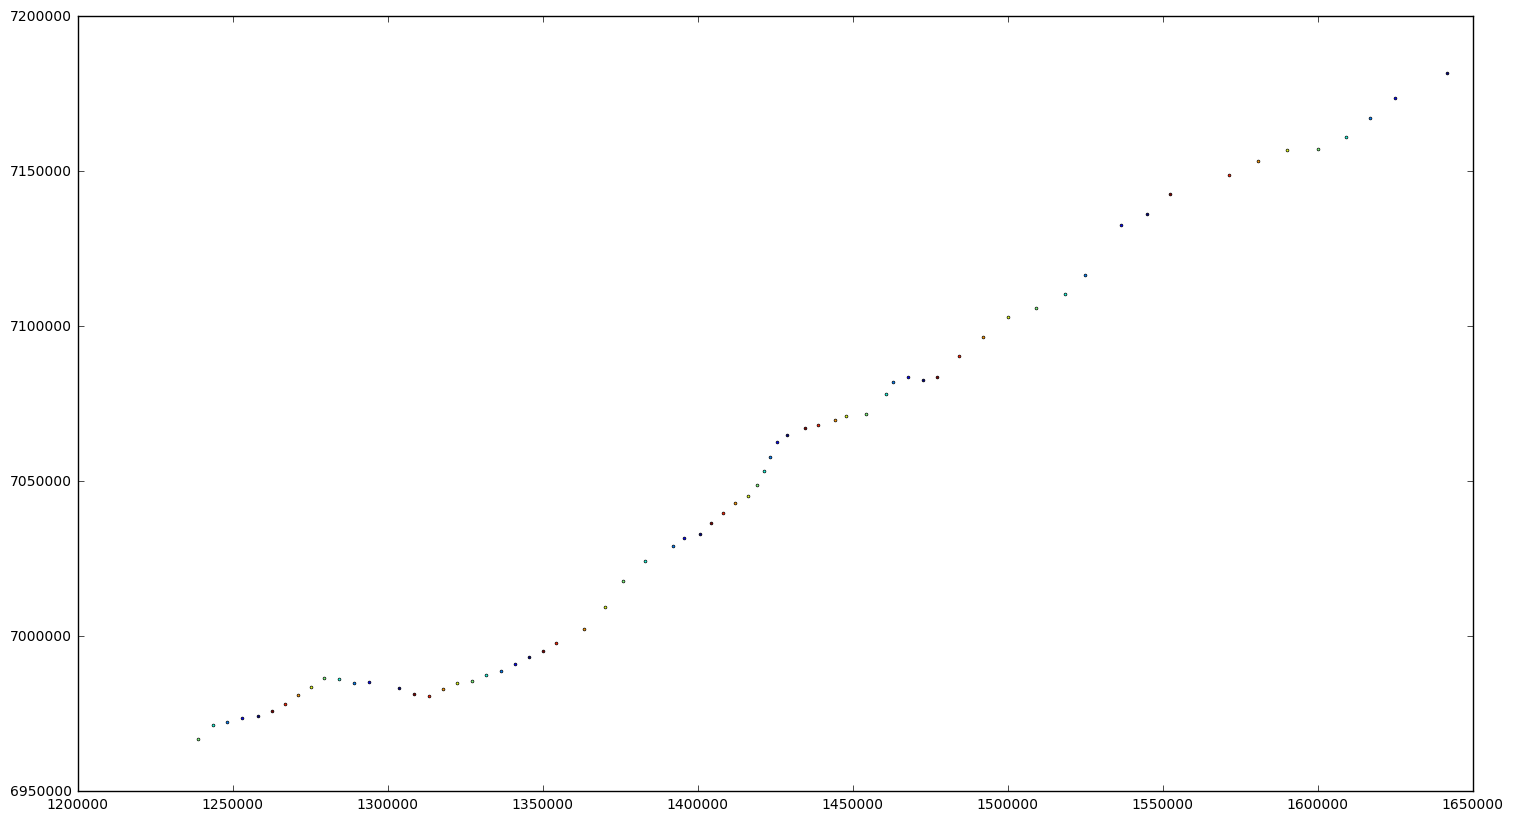

In [19]:
mygdf2utm.plot()

In [20]:
mygdf2utm.crs

{'init': 'epsg:32750'}

In [21]:
new_gdf = mygdf2utm.to_crs({'init':'epsg:4283'}) 

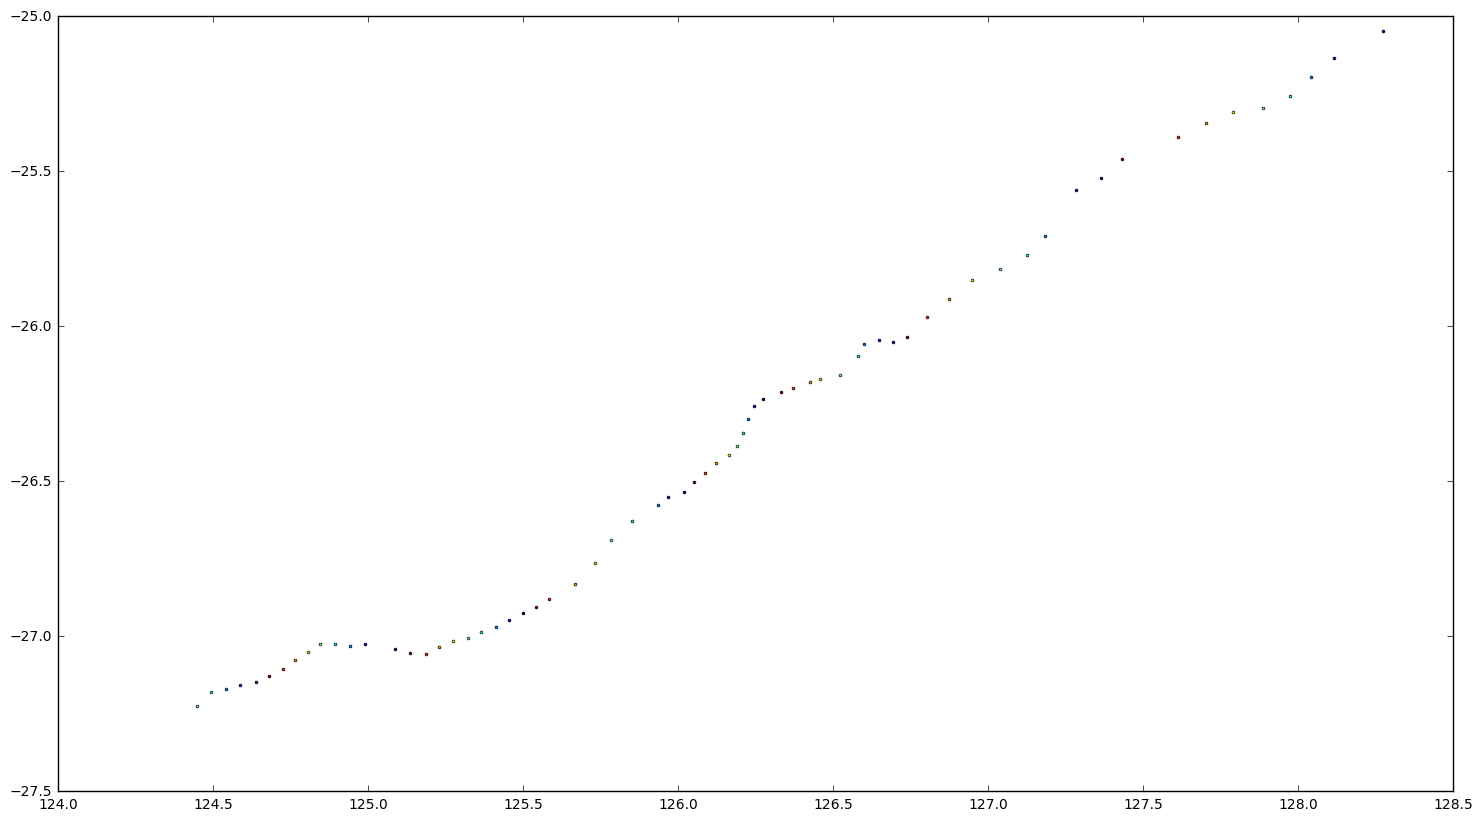

In [22]:
new_gdf.plot()

In [23]:
new_gdf.head()

,lat,lon,pendepths,geometry
0,-25.0482,128.2728,"5.17,54.13,69.46,111.20,139.19,214.43,266.28,4...",POINT (128.2728 -25.0482)
1,-25.1328,128.1152,"10.33,86.29,191.71,386.30,542.84,856.02,1055.0...",POINT (128.1152 -25.1328)
2,-25.1951,128.0423,"18.38,171.71,210.80,318.73,397.91,591.31,714.9...",POINT (128.0423 -25.1951)
3,-25.2557,127.9728,"19.55,62.79,76.11,112.53,140.22,217.03,271.02,...",POINT (127.9728 -25.2557)
4,-25.2959,127.8855,"46.14,89.30,94.37,119.33,141.58,199.62,240.01,...",POINT (127.8855 -25.29590000000001)


2017-03-06 16:09:49,908 - Fiona - DEBUG - Got coordinate system
2017-03-06 16:09:49,911 - Fiona - DEBUG - Index: 0
(46, 7)


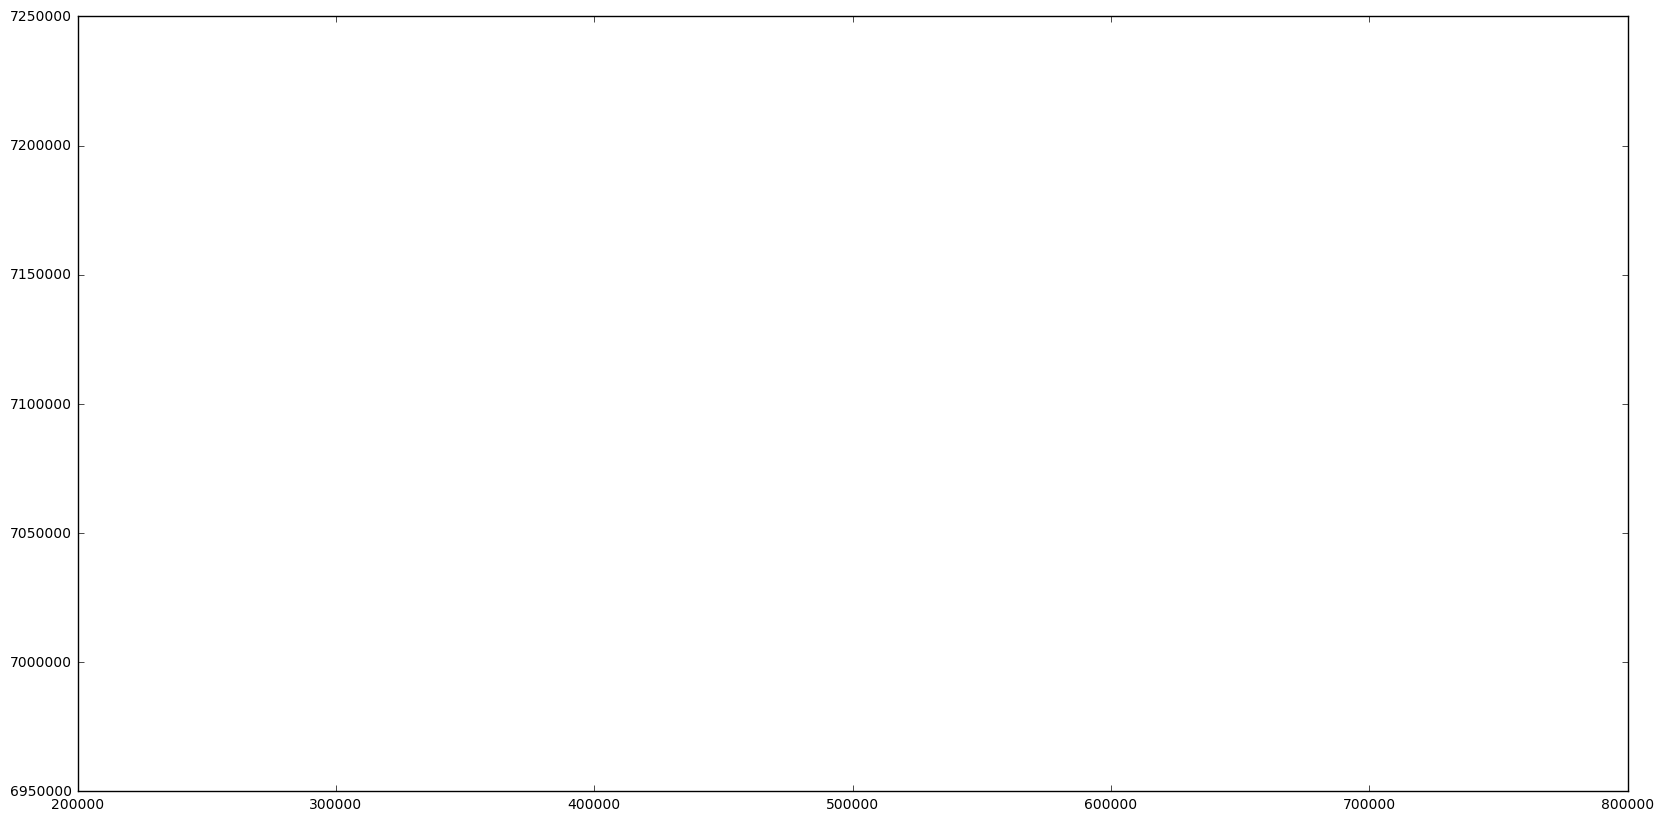

In [47]:

shpfile=r'/Softlab/Data/MT_datasets/728889/Phase_Tensor_Shapes/Tip_2s_WGS84_imag.shp'
shpfile=r'E:/Datasets/MT_Datasets/75098/Phase_Tensor_Shapes/PT_2s_WGS84.shp'

shpf=gpd.GeoDataFrame.from_file(shpfile)

#shpf['phi_max'].plot(marker='*', markersize=14)

shpf.plot(cmap='OrRd', scheme='quantiles');  #(marker='o', color='red', markersize=5)
print shpf.shape

In [48]:
shpf.shape

(46, 7)

In [43]:
shpf.crs

{u'ellps': u'GRS80', u'no_defs': True, u'proj': u'longlat'}

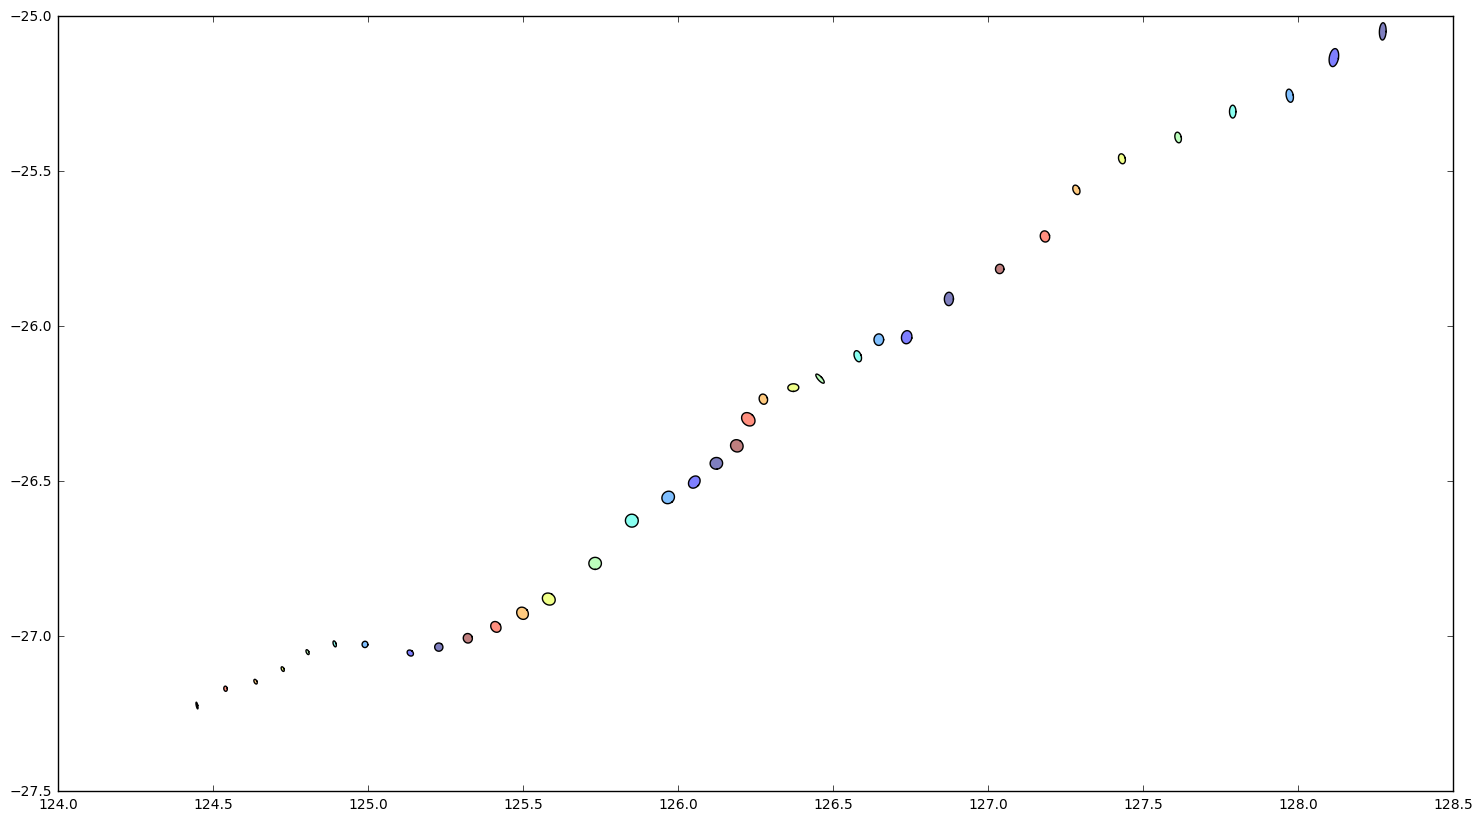

In [44]:
shpf.to_crs({'init':'epsg:4283'}).plot()

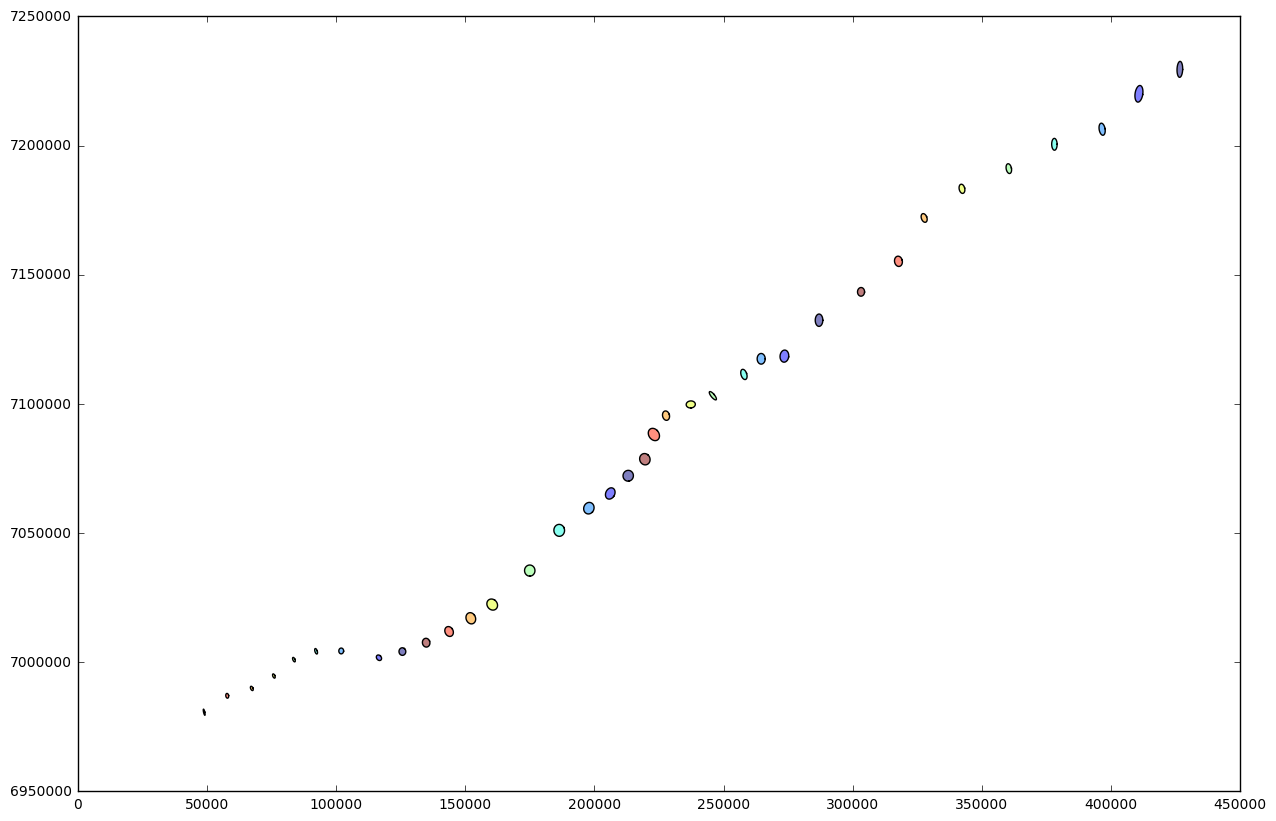

In [39]:
shpf.to_crs({'init':'epsg:32752'}).plot()


# Reading Shape files

# Analyze and visualize the geodata

In [29]:
# #shpfile=r'E:\MT_shape_files\PT_0.8547s_WGS84.shp'
# shpfile=r'/Softlab/Data/MT_datasets/75099_Youanmi/Phase_Tensor_Shapes/PT_109.23s_WGS84.shp'
# shpfile=r'/Softlab/Data/MT_datasets/75098/Location_shapefile/YOM_MT_CDP.shp'

shapefile_list=[
    "/Softlab/Data/MT_datasets/75099_Youanmi/Location_shapefiles/YMB2.shp",
    "/Softlab/Data/MT_datasets/75099_Youanmi/Location_shapefiles/YMB1.shp",
    "/Softlab/Data/MT_datasets/75099_Youanmi/Location_shapefiles/YML.shp",
    "/Softlab/Data/MT_datasets/75099_Youanmi/Location_shapefiles/YNB3.shp",
    r'/Softlab/Data/MT_datasets/75098/Location_shapefile/YOM_MT_CDP.shp'
    ]

shp_list=[]
for shpfile in shapefile_list:
    print ("Processing shape file: %s",shpfile)

    shp_gpd=gpd.GeoDataFrame.from_file(shpfile)
    shp_list.append(shp_gpd)

    print(shp_gpd.shape, shp_gpd.columns)
    print("Projection: ", shp_gpd.crs)


('Processing shape file: %s', '/Softlab/Data/MT_datasets/75099_Youanmi/Location_shapefiles/YMB2.shp')


IOError: no such file or directory: '/Softlab/Data/MT_datasets/75099_Youanmi/Location_shapefiles/YMB2.shp'

In [ ]:


# the first 3 shape files are of the same structure, they can be joined well:
rdf = gpd.GeoDataFrame( pd.concat( shp_list[:3], ignore_index=True) )

# if include the 4'th shapoe file, which has different columns, the concat will produce a many more columns gpd!!!!!

In [ ]:
rdf.shape

In [ ]:
rdf.columns

In [ ]:
rdf.head()

In [ ]:
rdf.plot()

In [ ]:

icount=4

shpf=shp_list[ icount ]

shpf.head()


In [ ]:
shpf.plot(marker='*', markersize=8)


# Re-Projecting

In [ ]:
shpf.geometry.crs

In [ ]:
# WGS84: 'epsg:4326'

# GDA94:  EPSG:4283 See  http://epsg.io/4283

#http://spatialreference.org/ref/epsg/4283/
    
myshpf= shpf.to_crs({'init':'epsg:4283'}) 


In [ ]:
myshpf.geometry.crs

In [ ]:
myshpf.plot(marker='^', markersize=10)


In [ ]:
# Now, we create centroids and make it the geometry:

myshpf['centroid_column'] =myshpf.centroid

myshpf = myshpf.set_geometry('centroid_column')

myshpf.plot(marker='o', markersize='12');

In [ ]:
myshpf.iloc[-2:]

In [ ]:
myshpf['geometry'][:10]

## Mapping onto World Basemap

In [ ]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.shape

In [ ]:


myax=world.plot(alpha=0.5)
#myax.set_xlim([149,150])
myax.set_xlim([110,155])
myax.set_ylim([-40,-10])
    
myax=myshpf.plot(ax=myax, figsize=(10, 6),  marker='o', color='blue', markersize=5);

In [ ]:
# what if the crs are different in layers.
world.crs

In [ ]:
myax=world.plot(alpha=0.5)
#myax.set_xlim([149,150])
myax.set_xlim([110,155])
myax.set_ylim([-40,-10])

rdf.plot(ax=myax, figsize=(10, 6),  marker='^', color='blue', markersize=5);


# Mapping with Folium

In [ ]:
# conda install folium

import folium

mapa = folium.Map([-30.0, 149.0], zoom_start=4,   tiles='cartodbpositron')


In [ ]:
myshpf = myshpf.set_geometry('geometry')
myshp2json=myshpf.geometry.to_json()

points =folium.features.GeoJson(myshp2json)
mapa.add_children(points)

In [ ]:
geoj2=shpf.to_crs(epsg=4326).to_json()

points2 =folium.features.GeoJson(geoj2)
mapa.add_children(points2)

In [ ]:
shpf3= shpf.to_crs({'init': 'epsg:4326'})
shpf3.plot()


In [ ]:
myax=world.plot(alpha=0.5)
#myax.set_xlim([149,150])
myax.set_xlim([110,155])
myax.set_ylim([-40,-10])
shpf3.plot(ax=myax, figsize=(10, 6),  marker='o', color='blue', markersize=5);

In [ ]:
#Phase Tensor shape files and Tipper (Real/Imag) Shape Files

#shpfile=r'E:\MT_shape_files\Tip_1.4286s_WGS84_imag.shp'
#shpfile=r'/Softlab/Data/MT_datasets/728889/Phase_Tensor_Shapes/Tip_2s_WGS84_imag.shp'
shpfile=mt_survey_loc_shp

shpf=gpd.GeoDataFrame.from_file(shpfile)

#shpf['phi_max'].plot(marker='*', markersize=14)

shpf.plot(cmap='OrRd', scheme='quantiles');  #(marker='o', color='red', markersize=5)
print mt_survey_loc_shp
print shpf.shape

In [ ]:

shpfile=r'/Softlab/Data/MT_datasets/728889/Phase_Tensor_Shapes/Tip_2s_WGS84_imag.shp'
#shpfile=r'E:/Datasets/MT_Datasets/75098/Phase_Tensor_Shapes/PT_2s_WGS84.shp'

shpf=gpd.GeoDataFrame.from_file(shpfile)

#shpf['phi_max'].plot(marker='*', markersize=14)

shpf.plot(cmap='OrRd', scheme='quantiles');  #(marker='o', color='red', markersize=5)
print shpf.shape

In [ ]:
shpf.crs